## Komparasi Model Algoritma untuk Sentimen Analisis: KNN, MNaiveBayes, SGradientDescent dan DTree

In [ ]:
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D


## Mengimport Dataset
Crawling dataset dengan software webharvy
Menggunakan library pandas untuk menampilkan dan membaca dataset.

In [ ]:
data = pd.read_csv("dataset_ready_modif.csv", sep=';', encoding='latin1')
data.head(10)

,Review,SENTIMEN,SOURCE,DATE_REVIEW,MONTH,YEAR,TRIMESTER,CONCAT
0,"Sekarang mau order malah sulit, gimana sihha p...",NEGATIF,BUKALAPAK,01/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
1,aplikasinya lemot banget. Gabisa login padahal...,NEGATIF,BUKALAPAK,02/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
2,KECEWAAAAA.....sudah 2 x 24 jam lebih... statu...,NEGATIF,BUKALAPAK,03/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
3,"pakait sudah 5 hari statusnya masih di gudang,...",NEGATIF,BUKALAPAK,04/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
4,Apaan sih gratis ongkirnya gak bisa di pakai.....,NEGATIF,BUKALAPAK,05/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
5,Tolong metode pembatalannya di percepat yc,NEGATIF,BUKALAPAK,06/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
6,Daftar akun aja sulitnya minta ampun,NEGATIF,BUKALAPAK,07/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
7,Aplikasi nya kurang jossss Pas verifikasi nom...,NEGATIF,BUKALAPAK,08/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
8,"Kenapa berat banget aplikasinya, kurang respon...",NEGATIF,BUKALAPAK,13/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
9,Aku gak ngerti kok uinstal terus sih,NEGATIF,BUKALAPAK,19/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1


DATA TIAP E-COMMERCE:
SHOPEE       400
BUKALAPAK    348
TOKOPEDIA    295
LAZADA       289
Name: SOURCE, dtype: int64


DATA E-COMMERCE TIAP SENTIMEN:
                    Review  DATE_REVIEW  MONTH  YEAR  TRIMESTER  CONCAT
SOURCE    SENTIMEN                                                     
BUKALAPAK NEGATIF      183          183    183   183        183     183
          POSITIF      165          165    165   165        165     165
LAZADA    NEGATIF      184          184    184   184        184     184
          POSITIF      105          105    105   105        105     105
SHOPEE    NEGATIF      201          201    201   201        201     201
          POSITIF      199          199    199   199        199     199
TOKOPEDIA NEGATIF      207          207    207   207        207     207
          POSITIF       88           88     88    88         88      88


VISUALISASI DATA:


Text(0.5, 1.0, '\nDataset E-Commerce 2020-2022')

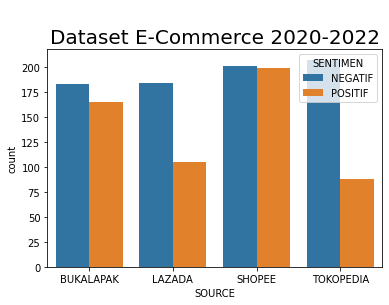

In [ ]:
print('DATA TIAP E-COMMERCE:')
print(data['SOURCE'].value_counts())
print('')
print('')
print('DATA E-COMMERCE TIAP SENTIMEN:')
print(data.groupby(['SOURCE','SENTIMEN']).count())
print('')
print('')
print('VISUALISASI DATA:')
sns.countplot(x ='SOURCE', data = data, hue = 'SENTIMEN')
plt.title("\nDataset E-Commerce 2020-2022", fontsize='20')

## GRAFIK TREND SENTIMEN 2020-2022 TIAP E-COMMERCE

### FILTER DATA SHOPEE

In [1]:
#SHOPEE
data_shopee_negatif_filter1 = data[data['SENTIMEN'].str.contains('NEGATIF')]
data_shopee_negatif_filter2 = data_shopee_negatif_filter1[data['SOURCE'].str.contains('SHOPEE')]
data_shopee_negatif_filter2.head()

NameError: name 'data' is not defined

### FILTER DATA TOKOPEDIA

In [ ]:
#TOKOPEDIA
data_tokopedia_negatif_filter1 = data[data['SENTIMEN'].str.contains('NEGATIF')]
data_tokopedia_negatif_filter2 = data_tokopedia_negatif_filter1[data['SOURCE'].str.contains('TOKOPEDIA')]
data_tokopedia_negatif_filter2.head()

### FILTER DATA BUKALAPAK

In [ ]:
#BUKALAPAK
data_bukalapak_negatif_filter1 = data[data['SENTIMEN'].str.contains('NEGATIF')]
data_bukalapak_negatif_filter2 = data_bukalapak_negatif_filter1[data['SOURCE'].str.contains('BUKALAPAK')]
data_bukalapak_negatif_filter2.head()

### FILTER DATA LAZADA

In [ ]:
#LAZADA
data_lazada_negatif_filter1 = data[data['SENTIMEN'].str.contains('NEGATIF')]
data_lazada_negatif_filter2 = data_lazada_negatif_filter1[data['SOURCE'].str.contains('LAZADA')]
data_lazada_negatif_filter2.head()

### GROUPING SHOPEE

In [ ]:
#SHOPEE
data_trend_negatif_shopee = data_shopee_negatif_filter2.groupby(['CONCAT']).count()
data_trend_negatif_shopee.sort_index(axis=0)

### GROUPING TOKOPEDIA

In [ ]:
#TOKOPEDIA
data_trend_negatif_tokopedia = data_tokopedia_negatif_filter2.groupby(['CONCAT']).count()
data_trend_negatif_tokopedia.sort_index(axis=0)

### GROUPING BUKALAPAK

In [ ]:
#BUKALAPAK
data_trend_negatif_bukalapak = data_bukalapak_negatif_filter2.groupby(['CONCAT']).count()
data_trend_negatif_bukalapak.sort_index(axis=0)

### GROUPING LAZADA

In [ ]:
#LAZADA
data_trend_negatif_lazada = data_lazada_negatif_filter2.groupby(['CONCAT']).count()
data_trend_negatif_lazada.sort_index(axis=0)

### VISUALISASI TREND

In [ ]:
plt.rcParams["figure.figsize"] = [15.00, 5.00]
plt.rcParams["figure.autolayout"] = True
plt.plot(data_trend_negatif_shopee, 'b-o')
plt.plot(data_trend_negatif_tokopedia, 'r-o')
plt.plot(data_trend_negatif_bukalapak, 'y-o')
plt.plot(data_trend_negatif_lazada, 'm-o', label='Lazada')
plt.xlabel('Trimester (X)')
plt.ylabel('Sentimen Negatif (Y)')
colors = ['blue', 'red', 'yellow', 'magenta']
lines = [Line2D([0], [0], color=c, linewidth=4, linestyle='-') for c in colors]
labels = ['Shopee', 'Tokopedia', 'Bukalapak', 'Lazada']
plt.legend(lines, labels)
plt.title("\nTrend Sentimen E-Commerce 2020-2022", fontsize='20')
plt.show()

Apabila diperhatikan berdasarkan grafik trend diatas, maka sentimen negatif Tokopedia meningkat dari 2020 Trimester 1 hingga 2022 Trimester 3, kemungkinan sentimen ini dipengaruhi faktor isu kebocoran data pada tahun 2020
Sedangkan sentimen negatif Shopee bisa dikatakan stagnan, fluktuatif namun tidak signifikan,
Sentimen negatif Bukalapak dan Lazada mengalami penurunan sepanjang tahun 2020 Trimester 1 - 2022 Trimester 3, bisa disimpulkan ke 2 e-commerce tsb mengalami peningkatan secara signifikan tingkat kepercayaan pengguna terhadap 2 platform tsb

## Preprocessing Dataset
Tahapan yang dilakukan:
1. Case folding
2. Tokenizing
3. Normalization
4. Stopwords
5. Stemming

In [ ]:
# Case Folding
def casefolding(Review):
    Review = Review.lower()
    return Review
data['Review'] = data['Review'].apply(casefolding)
data.head(10)

,Review,SENTIMEN,SOURCE,DATE_REVIEW,MONTH,YEAR,TRIMESTER,CONCAT
0,"sekarang mau order malah sulit, gimana sihha p...",NEGATIF,BUKALAPAK,01/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
1,aplikasinya lemot banget. gabisa login padahal...,NEGATIF,BUKALAPAK,02/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
2,kecewaaaaa.....sudah 2 x 24 jam lebih... statu...,NEGATIF,BUKALAPAK,03/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
3,"pakait sudah 5 hari statusnya masih di gudang,...",NEGATIF,BUKALAPAK,04/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
4,apaan sih gratis ongkirnya gak bisa di pakai.....,NEGATIF,BUKALAPAK,05/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
5,tolong metode pembatalannya di percepat yc,NEGATIF,BUKALAPAK,06/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
6,daftar akun aja sulitnya minta ampun,NEGATIF,BUKALAPAK,07/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
7,aplikasi nya kurang jossss pas verifikasi nom...,NEGATIF,BUKALAPAK,08/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
8,"kenapa berat banget aplikasinya, kurang respon...",NEGATIF,BUKALAPAK,13/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
9,aku gak ngerti kok uinstal terus sih,NEGATIF,BUKALAPAK,19/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1


In [ ]:
# Tokenizing manual dengan regex
import re
import string
def cleansing(Review):
    Review = Review.strip(" ")
    Review = re.sub(r'[?|$|.|!_:")(-+,]', '', Review)
    Review = re.sub(r'\d+', '', Review)
    Review = re.sub(r"\b[a-zA-Z]\b", "", Review)
    Review = re.sub('\s+',' ', Review)
    return Review
data['Review'] = data['Review'].apply(cleansing)
# data.head(10)
data


,Review,SENTIMEN,SOURCE,DATE_REVIEW,MONTH,YEAR,TRIMESTER,CONCAT
0,sekarang mau order malah sulit gimana sihha pa...,NEGATIF,BUKALAPAK,01/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
1,aplikasinya lemot banget gabisa login padahal ...,NEGATIF,BUKALAPAK,02/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
2,kecewaaaaasudah jam lebih status belum berubah...,NEGATIF,BUKALAPAK,03/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
3,pakait sudah hari statusnya masih di gudang ka...,NEGATIF,BUKALAPAK,04/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
4,apaan sih gratis ongkirnya gak bisa di pakai t...,NEGATIF,BUKALAPAK,05/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
...,...,...,...,...,...,...,...,...
1327,pesan warna merah dikirim warna biru sangat me...,NEGATIF,TOKOPEDIA,18/11/2022,November,2022,TRIMESTER3,2022-TRIMESTER3
1328,hp ringkih gmpg rusak antara hp nokia atau rep...,NEGATIF,TOKOPEDIA,21/11/2022,November,2022,TRIMESTER3,2022-TRIMESTER3
1329,koj batre nya boros banget yak ama sinyal gak ...,NEGATIF,TOKOPEDIA,30/09/2022,September,2022,TRIMESTER3,2022-TRIMESTER3
1330,hp nya gampang mati sendiri &amp; saya tanya t...,NEGATIF,TOKOPEDIA,21/09/2022,September,2022,TRIMESTER3,2022-TRIMESTER3


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Tokenizing dengan library nltk
from nltk.tokenize import word_tokenize
def word_tokenize_wrapper(text):
 return word_tokenize(text)
data['Review'] = data['Review'].apply(word_tokenize_wrapper)
data.head()

,Review,SENTIMEN,SOURCE,DATE_REVIEW,MONTH,YEAR,TRIMESTER,CONCAT
0,"[sekarang, mau, order, malah, sulit, gimana, s...",NEGATIF,BUKALAPAK,01/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
1,"[aplikasinya, lemot, banget, gabisa, login, pa...",NEGATIF,BUKALAPAK,02/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
2,"[kecewaaaaasudah, jam, lebih, status, belum, b...",NEGATIF,BUKALAPAK,03/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
3,"[pakait, sudah, hari, statusnya, masih, di, gu...",NEGATIF,BUKALAPAK,04/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
4,"[apaan, sih, gratis, ongkirnya, gak, bisa, di,...",NEGATIF,BUKALAPAK,05/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1


In [ ]:
# Normalization
normalizad_word = pd.read_csv("normalisasi.csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

data['Review'] = data['Review'].apply(normalized_term)

data['Review'].head(20)

0     [sekarang, mau, order, malah, sulit, bagaimana...
1     [aplikasinya, lemot, banget, gabisa, login, pa...
2     [kecewaaaaasudah, jam, lebih, status, belum, b...
3     [pakait, sudah, hari, statusnya, masih, di, gu...
4     [apaan, sih, gratis, ongkirnya, tidak, bisa, d...
5     [tolong, metode, pembatalannya, di, percepat, yc]
6          [daftar, akun, saja, sulitnya, minta, ampun]
7     [aplikasi, nya, kurang, jossss, pas, verifikas...
8     [kenapa, berat, banget, aplikasinya, kurang, r...
9       [saya, tidak, ngerti, kok, uinstal, terus, sih]
10    [buruk, sekali, hari, hari, ini, kok, bermasal...
11    [males, tidak, bisa, masuk, server, eror, bera...
12    [tolong, kembalikan, pilihan, jasa, kirim, sep...
13                        [pas, chekout, sering, gagal]
14    [sudah, di, update, tetapi, fitur, fontnya, te...
15    [bintang, yang, bicara, verikasi, nomer, telep...
16    [belanja, di, sini, bisa, bayar, di, tempat, k...
17    [saya, ada, masalah, tetapi, cs, tidak, bi

In [ ]:
# Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = pd.read_csv("stopwords.csv")
def stopword_removal(Review):
    filtering = stopwords.words('indonesian','english')
    filtering.extend(sw)
    x = []
    data = []
    def myFunc(x):
        if x in filtering:
            return False
        else:
            return True
    fit = filter(myFunc, Review)
    for x in fit:
        data.append(x)
    return data
data['Review'] = data['Review'].apply(stopword_removal)
data.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Review,SENTIMEN,SOURCE,DATE_REVIEW,MONTH,YEAR,TRIMESTER,CONCAT
0,"[order, sulit, sihha, persyaratan, ngak]",NEGATIF,BUKALAPAK,01/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
1,"[aplikasinya, lemot, banget, gabisa, login, co...",NEGATIF,BUKALAPAK,02/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
2,"[kecewaaaaasudah, jam, status, berubah, kemasp...",NEGATIF,BUKALAPAK,03/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
3,"[pakait, statusnya, gudang, kagak, gerak]",NEGATIF,BUKALAPAK,04/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
4,"[sih, gratis, ongkirnya, pakai, tipu-tipu, pas...",NEGATIF,BUKALAPAK,05/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
5,"[tolong, metode, pembatalannya, percepat, yc]",NEGATIF,BUKALAPAK,06/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
6,"[daftar, akun, sulitnya, ampun]",NEGATIF,BUKALAPAK,07/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
7,"[aplikasi, nya, jossss, pas, verifikasi, nomer...",NEGATIF,BUKALAPAK,08/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
8,"[berat, banget, aplikasinya, responsif, memili...",NEGATIF,BUKALAPAK,13/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
9,"[ngerti, uinstal, sih]",NEGATIF,BUKALAPAK,19/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1


In [ ]:
# Stemming
! pip install Sastrawi
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(Review):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in Review:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean=[]
    d_clean=" ".join(do)
    print(d_clean)
    return d_clean
data['Review'] = data['Review'].apply(stemming)

data.to_csv('cleandataset.csv', index=False)
data_clean = pd.read_csv('cleandataset.csv', encoding='latin1')
data_clean.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 15.6 MB/s eta 0:00:00
order sulit sihha syarat ngak
aplikasi lot banget gabisa login coba pakai line pakai password loading pakai nomer telepon kode gamasuk mau sih tambah kali ngasih ulas tulis halaman baik capek tulis ulas masak ulang
kecewaaaaasudah jam status ubah kemaspadahal info jual barang kirim
pakait status gudang kagak gerak
sih gratis ongkirnya pakai tipu pas check out gagal gagal hadeh niat ngasih gratis ongkir yowes usa
tolong metode batal cepat yc
daftar akun sulit ampun
aplikasi nya jossss pas verifikasi nomer hp muncul kode emosi
berat banget aplikasi responsif pilih item
ngerti uinstal sih
buruk masalah mulu
males masuk server eror alih deh lazada
tolong kembali pilih jasa kirim
pas chekout gagal
update fitur fontnya tetep ubah
bintang bicara verikasi nomer telepon bisarugi data
belanja bayar kah nya sekolah pand

,Review,SENTIMEN,SOURCE,DATE_REVIEW,MONTH,YEAR,TRIMESTER,CONCAT
0,order sulit sihha syarat ngak,NEGATIF,BUKALAPAK,01/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
1,aplikasi lot banget gabisa login coba pakai li...,NEGATIF,BUKALAPAK,02/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
2,kecewaaaaasudah jam status ubah kemaspadahal i...,NEGATIF,BUKALAPAK,03/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
3,pakait status gudang kagak gerak,NEGATIF,BUKALAPAK,04/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
4,sih gratis ongkirnya pakai tipu pas check out ...,NEGATIF,BUKALAPAK,05/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1


In [ ]:
import string
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import re

In [ ]:
data_clean = pd.read_csv('cleandataset.csv', encoding='latin1')
data_clean.head()

,Review,SENTIMEN,SOURCE,DATE_REVIEW,MONTH,YEAR,TRIMESTER,CONCAT
0,order sulit sihha syarat ngak,NEGATIF,BUKALAPAK,01/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
1,aplikasi lot banget gabisa login coba pakai li...,NEGATIF,BUKALAPAK,02/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
2,kecewaaaaasudah jam status ubah kemaspadahal i...,NEGATIF,BUKALAPAK,03/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
3,pakait status gudang kagak gerak,NEGATIF,BUKALAPAK,04/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1
4,sih gratis ongkirnya pakai tipu pas check out ...,NEGATIF,BUKALAPAK,05/01/2020,January,2020,TRIMESTER1,2020-TRIMESTER1


In [ ]:
data_clean = data_clean.astype({'SENTIMEN' : 'category'})
data_clean = data_clean.astype({'Review' : 'string'})
data_clean.dtypes

Review           string
SENTIMEN       category
SOURCE           object
DATE_REVIEW      object
MONTH            object
YEAR              int64
TRIMESTER        object
CONCAT           object
dtype: object

## TF-IDF
Ekstraksi fitur Text: Word Counting

In [ ]:
# TF IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data_clean['Review'].astype('U'))

tf = TfidfVectorizer()
text_tf = tf.fit_transform(data_clean['Review'].astype('U'))
print(text_tf)

  (0, 1793)	0.4374138340181172
  (0, 2680)	0.49827224469997766
  (0, 2535)	0.49827224469997766
  (0, 2663)	0.4150659428444779
  (0, 1977)	0.37395045289916
  (1, 2889)	0.16417166923460738
  (1, 1599)	0.1920333528688851
  (1, 436)	0.1985399782621238
  (1, 179)	0.12732377171776482
  (1, 930)	0.21875140279006153
  (1, 2859)	0.3032210076260192
  (1, 2890)	0.36444437037539495
  (1, 1802)	0.18222218518769748
  (1, 1171)	0.13883146249402734
  (1, 2690)	0.18222218518769748
  (1, 2532)	0.12997641069682264
  (1, 1614)	0.21875140279006153
  (1, 835)	0.20692847735506215
  (1, 1327)	0.16417166923460738
  (1, 2724)	0.18222218518769748
  (1, 1874)	0.17489412739212504
  (1, 1504)	0.17182192834094737
  (1, 2044)	0.17832855373418605
  (1, 1494)	0.21875140279006153
  (1, 2011)	0.30977508232693857
  :	:
  (1329, 1737)	0.27066093047924583
  (1329, 1893)	0.1616634246625637
  (1329, 198)	0.18120396166029148
  (1330, 2547)	0.3254349796495301
  (1330, 2269)	0.3254349796495301
  (1330, 1871)	0.2856867178259574
 

## Splitting dataset untuk Training dan Testing

In [ ]:
# Splitting data
import collections, numpy
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_tf, data_clean['SENTIMEN'], test_size=0.4, random_state=33)
print("Jumlah Data Uji:", X_test.shape)
print("Jumlah Data Latih:",X_train.shape)

pos = (y_test == 'POSITIF').sum()
neg = (y_test == 'NEGATIF').sum()
postrain = (y_train == 'POSITIF').sum()
negtrain = (y_train == 'NEGATIF').sum()
total = pos + neg
print("Jumlah data uji dengan sentimen positif:", pos)
print("Jumlah data uji dengan sentimen negatif:",neg)
print("Jumlah data latih dengan sentimen positif:", postrain)
print("Jumlah data latih dengan sentimen negatif:",negtrain)
data_clean['SENTIMEN'].value_counts()

Jumlah Data Uji: (533, 3023)
Jumlah Data Latih: (799, 3023)
Jumlah data uji dengan sentimen positif: 223
Jumlah data uji dengan sentimen negatif: 310
Jumlah data latih dengan sentimen positif: 334
Jumlah data latih dengan sentimen negatif: 465


NEGATIF    775
POSITIF    557
Name: SENTIMEN, dtype: int64

### Perform algoritma KNN, MNaiveBayes, SGradientDescent, DTree

In [ ]:
# perform algoritma KNN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('===============================================\n')
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)
print(classification_report(y_test, predicted, zero_division=0))
print('===============================================\n')
print("Hasil Klasifikasi Sentimen Analisis Shopee:")
print("Accuracy:" , accuracy_score(y_test,predicted))
print("Precision:" , precision_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("Recall:" , recall_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("f1_score:" , f1_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("error_rate:", 1-accuracy_score(y_test,predicted))
saveKnn = round(accuracy_score(y_test,predicted),3)

confusion matrix:
 [[255  55]
 [ 25 198]]

TN: 255
FP: 55
FN: 25
TP: 198
              precision    recall  f1-score   support

     NEGATIF       0.91      0.82      0.86       310
     POSITIF       0.78      0.89      0.83       223

    accuracy                           0.85       533
   macro avg       0.85      0.86      0.85       533
weighted avg       0.86      0.85      0.85       533


Hasil Klasifikasi Sentimen Analisis Shopee:
Accuracy: 0.849906191369606
Precision: 0.782608695652174
Recall: 0.8878923766816144
f1_score: 0.8319327731092437
error_rate: 0.150093808630394


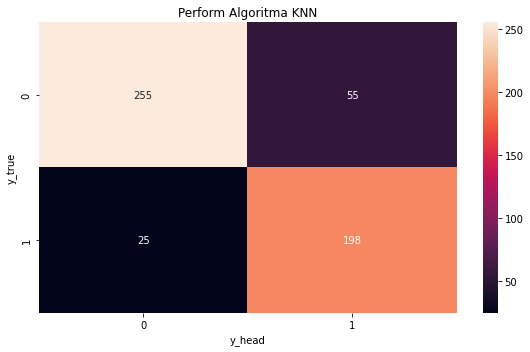

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, predicted), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.title("Perform Algoritma KNN")
plt.show()

In [ ]:
# perform algoritma MNaiveBayes
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('===============================================\n')
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)
print(classification_report(y_test, predicted, zero_division=0))
print('===============================================\n')
print("Hasil Klasifikasi Sentimen Analisis Shopee:")
print("Accuracy:" , accuracy_score(y_test,predicted))
print("Precision:" , precision_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("Recall:" , recall_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("f1_score:" , f1_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("error_rate:", 1-accuracy_score(y_test,predicted))
saveMNB = round(accuracy_score(y_test,predicted),3)

confusion matrix:
 [[296  14]
 [ 47 176]]

TN: 296
FP: 14
FN: 47
TP: 176
              precision    recall  f1-score   support

     NEGATIF       0.86      0.95      0.91       310
     POSITIF       0.93      0.79      0.85       223

    accuracy                           0.89       533
   macro avg       0.89      0.87      0.88       533
weighted avg       0.89      0.89      0.88       533


Hasil Klasifikasi Sentimen Analisis Shopee:
Accuracy: 0.8855534709193246
Precision: 0.9263157894736842
Recall: 0.7892376681614349
f1_score: 0.8523002421307506
error_rate: 0.11444652908067543


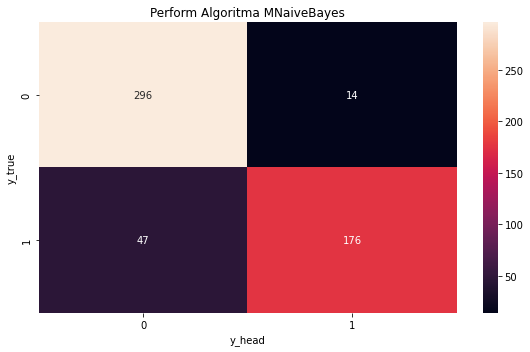

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, predicted), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.title("Perform Algoritma MNaiveBayes")
plt.show()

In [ ]:
# perform algoritma SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('===============================================\n')
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)
print(classification_report(y_test, predicted, zero_division=0))
print('===============================================\n')
print("Hasil Klasifikasi Sentimen Analisis Shopee:")
print("Accuracy:" , accuracy_score(y_test,predicted))
print("Precision:" , precision_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("Recall:" , recall_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("f1_score:" , f1_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("error_rate:", 1-accuracy_score(y_test,predicted))
saveSGD = round(accuracy_score(y_test,predicted),3)

confusion matrix:
 [[280  30]
 [ 43 180]]

TN: 280
FP: 30
FN: 43
TP: 180
              precision    recall  f1-score   support

     NEGATIF       0.87      0.90      0.88       310
     POSITIF       0.86      0.81      0.83       223

    accuracy                           0.86       533
   macro avg       0.86      0.86      0.86       533
weighted avg       0.86      0.86      0.86       533


Hasil Klasifikasi Sentimen Analisis Shopee:
Accuracy: 0.8630393996247655
Precision: 0.8571428571428571
Recall: 0.8071748878923767
f1_score: 0.8314087759815242
error_rate: 0.1369606003752345


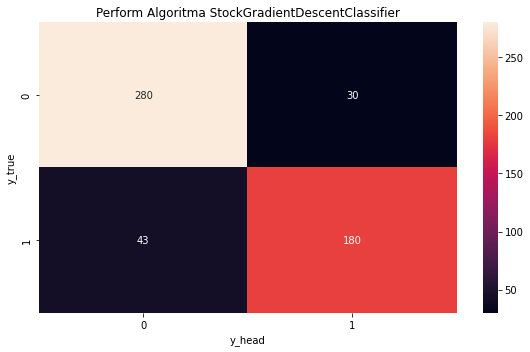

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, predicted), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.title("Perform Algoritma StockGradientDescentClassifier")
plt.show()

In [ ]:
# perform algoritma Decision Tree
from nltk.corpus.reader.timit import Tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('===============================================\n')
tn, fp, fn, tp = confusion_matrix(y_test, predicted).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)
print(classification_report(y_test, predicted, zero_division=0))
print('===============================================\n')
print("Hasil Klasifikasi Sentimen Analisis Shopee:")
print("Accuracy:" , accuracy_score(y_test,predicted))
print("Precision:" , precision_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("Recall:" , recall_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("f1_score:" , f1_score(y_test,predicted, average="binary", pos_label="POSITIF"))
print("error_rate:", 1-accuracy_score(y_test,predicted))
saveDT = round(accuracy_score(y_test,predicted),3)

confusion matrix:
 [[246  64]
 [ 70 153]]

TN: 246
FP: 64
FN: 70
TP: 153
              precision    recall  f1-score   support

     NEGATIF       0.78      0.79      0.79       310
     POSITIF       0.71      0.69      0.70       223

    accuracy                           0.75       533
   macro avg       0.74      0.74      0.74       533
weighted avg       0.75      0.75      0.75       533


Hasil Klasifikasi Sentimen Analisis Shopee:
Accuracy: 0.7485928705440901
Precision: 0.7050691244239631
Recall: 0.6860986547085202
f1_score: 0.6954545454545454
error_rate: 0.25140712945590993


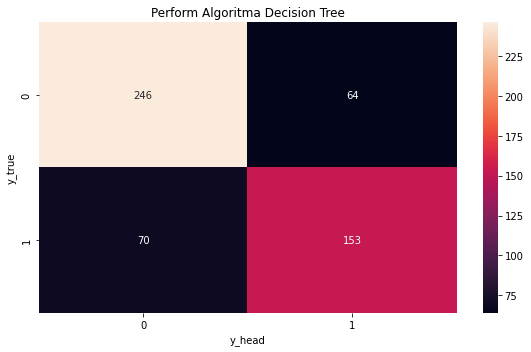

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, predicted), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.title("Perform Algoritma Decision Tree")
plt.show()

# ***Resume Pengujian***

In [ ]:
listAccuracy = []
listAccuracy.append(saveKnn)
listAccuracy.append(saveMNB)
listAccuracy.append(saveSGD)
listAccuracy.append(saveDT)
print(saveKnn)
print(saveMNB)
print(saveSGD)
print(saveDT)
print(listAccuracy)

0.85
0.886
0.863
0.749
[0.85, 0.886, 0.863, 0.749]


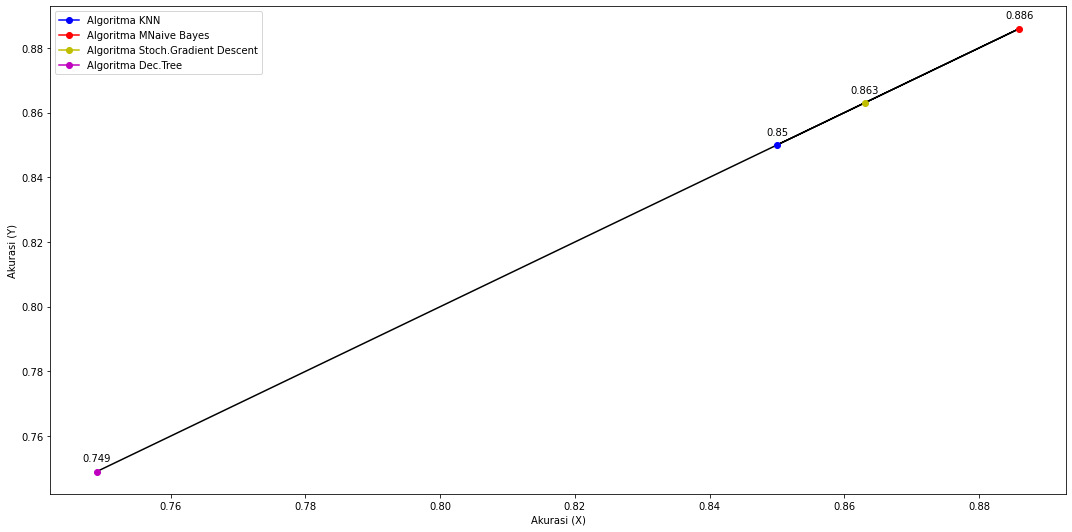

In [ ]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [15.00, 7.50]
plt.rcParams["figure.autolayout"] = True
plt.plot(listAccuracy, listAccuracy, 'k')
plt.plot(saveKnn, saveKnn, 'b-o', label='Algoritma KNN')
plt.plot(saveMNB, saveMNB, 'r-o', label='Algoritma MNaive Bayes')
plt.plot(saveSGD, saveSGD, 'y-o', label='Algoritma Stoch.Gradient Descent')
plt.plot(saveDT, saveDT, 'm-o', label='Algoritma Dec.Tree')
plt.xlabel('Akurasi (X)')
plt.ylabel('Akurasi (Y)')
plt.annotate(s=saveKnn, # this is the text
                 xy = (saveKnn,saveKnn), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.annotate(s=saveMNB, # this is the text
                 xy = (saveMNB,saveMNB), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.annotate(s=saveSGD, # this is the text
                 xy = (saveSGD,saveSGD), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.annotate(s=saveDT, # this is the text
                 xy = (saveDT,saveDT), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.legend()
plt.show()